In [1]:
# load packages
import numpy as np
import pandas as pd
import napari
import tifffile as tf
import os
import matplotlib.pyplot as plt
import copy # needed for deepcopy of dictionaries
from matplotlib.lines import Line2D # for custom legend
from matplotlib_scalebar.scalebar import ScaleBar

plt.rcParams['svg.fonttype'] = 'none'

from skimage.filters import threshold_otsu # threshold method used to threshold inj site


# import custum colormaps
from colormaps import *

# import custum functions
from STP_plotting import *
from STP_processing import *

# auto refreshes imported functions if source code changes:
%load_ext autoreload
%autoreload 2
# Set-up variables


In [2]:
home_dir = "/Volumes/Data/"
# home_dir = "/mnt/labNAS/"

in_path = home_dir+"Emily/STP_for_MAPseq/4_python_output/input_tifs/"
out_path = "/Users/eisko/Documents/CSHL/mapseq_paper/svg_images/"

# load metadata
metadata = pd.read_csv("stp_metadata.csv")

# STeg

In [3]:
# import masks from allen_STeg_220429_straight_asr
masks_folder = in_path+"masks/steg_220429_hs_asr/"

# area list from make_masks.py
# areas = ["grey", "CTX", "OMCi", "OMCc", "ACAi", "ACAc", "aud","TH", "STR", "CP", "AMY", "P", "PG", "MB", "PAG", "SCm", 
#          "SNr", "HY", "CNU", "TEa", "ECT", "VISC", "AI", "GU", "BS", "HIP"]
areas = ["grey", "CTX", "OMCi", "OMCc", "STR", "CP","BS"]


# make dictionary where keys = areas, values=list of masks corresponding to metadata order
masks = {}
for area in areas:
    print("working on", area)
    with open(masks_folder+"steg_220429_hs_asr_"+area+".npy", "rb") as f:
        masks[area] = np.load(f)

working on grey
working on CTX
working on OMCi
working on OMCc
working on STR
working on CP
working on BS


In [4]:
# load STeg/OMC brains
# aligned to STeg_220429 hand straight asr
sp = "STeg"
inj = "OMC"

meta_sp = metadata[metadata['species']==sp]
meta_sp_inj = meta_sp[meta_sp['inj_site']==inj].reset_index(drop=True)

for i in range(meta_sp_inj.shape[0]):
    meta_sp_inj.loc[i, 'path'] = in_path+"norm_subtracted/STeg_220429_aligned/"+meta_sp_inj.loc[i,'brain']+"_aligned_to_STeg_220429_NO_subtracted.tif"

images = []
for i in range(meta_sp_inj.shape[0]):
    print('loading:', meta_sp_inj.loc[i,'brain'])
    images.append(tf.imread(meta_sp_inj.loc[i,'path']))

loading: OMC_STeg_220208_b0
loading: OMC_STeg_220411_b1
loading: OMC_STeg_220429_b2


In [5]:
# Get threshold to mark saturated inj site
im_thr = [threshold_otsu(im) for im in images]
# create binary mask using threshold
masks['inj_thr'] = [images[i] > im_thr[i] for i in range(len(images))]
# use intersection of thresholded and OMCi (MOp+MOs) to mark injection site
masks['inj'] = [masks['inj_thr'][i] & masks['OMCi'] for i in range(len(images))] # bitwise operator


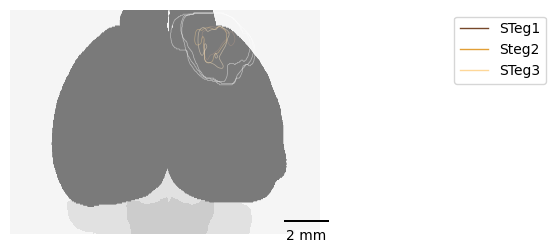

In [69]:
# specify colors to use for each individual
orange1 = create_cmap(103, 52, 19)
orange2 = create_cmap(224, 150, 32)
orange3 = create_cmap(255, 212, 143)
color_list = [orange1, orange2, orange3]

# plot topdown contour of brain
plot_contour(images, mask_dict=masks, roi="inj", masks_to_plot=["grey", "BS", "STR", "CP", "CTX"], 
             view="top", ncontours=1, alpha=0.5, cmaps=color_list, linewidths=0.5,
             ref_fill=True, plot_fill=False)

# set figure size
fig = plt.gcf()
fig.set_size_inches(4,4)

ax = plt.gca()
ax.invert_xaxis() # need to flip image so injection site on right side as injected
lines = [Line2D([0], [0], color=color_list[i].colors[-1], alpha=0.9, 
                linestyle="-", linewidth=1) for i in range(3)]
labels = ["STeg1", "Steg2", "STeg3"]
plt.legend(lines,labels, bbox_to_anchor=(1.75, 1))

# add scale bar
scalebar = ScaleBar(0.02, "mm", length_fraction=0.25, location="lower right", pad=-0.75)
ax.add_artist(scalebar)



plt.savefig(out_path+"steg_inj_contour.svg", dpi=300, bbox_inches="tight")
plt.show()

# MMus

In [70]:
# import masks from allen_mmus_220303_straight_asr
masks_folder = in_path+"masks/mmus_220303_hs_asr/"

# area list from make_masks.py
# areas = ["grey", "CTX", "OMCi", "OMCc", "ACAi", "ACAc", "aud","TH", "STR", "CP", "AMY", "P", "PG", "MB", "PAG", "SCm", 
#          "SNr", "HY", "CNU", "TEa", "ECT", "VISC", "AI", "GU", "BS", "HIP"]
areas = ["grey", "CTX", "OMCi", "OMCc", "STR", "CP","BS"]



# make dictionary where keys = areas, values=list of masks corresponding to metadata order
masks = {}
for area in areas:
    print("working on", area)
    with open(masks_folder+"mmus_220303_hs_asr_"+area+".npy", "rb") as f:
        masks[area] = np.load(f)


working on grey
working on CTX
working on OMCi
working on OMCc
working on STR
working on CP
working on BS


In [71]:

# load MMus/OMC brains
# aligned to MMus_220303 hand straight asr
sp = "MMus"
inj = "OMC"

meta_sp = metadata[metadata['species']==sp]
meta_sp_inj = meta_sp[meta_sp['inj_site']==inj].reset_index(drop=True)

for i in range(meta_sp_inj.shape[0]):
    meta_sp_inj.loc[i, 'path'] = in_path+"norm_subtracted/MMus_220303_aligned/"+meta_sp_inj.loc[i,'brain']+"_aligned_to_MMus_220303_NO_subtracted.tif"

images = []
for i in range(meta_sp_inj.shape[0]):
    print('loading:', meta_sp_inj.loc[i,'brain'])
    images.append(tf.imread(meta_sp_inj.loc[i,'path']))


loading: OMC_MMus_220119_b0
loading: OMC_MMus_220303_b1
loading: OMC_MMus_220324_b2


In [72]:
# Use otsu method to determine threshold for injection site
im_thr = [threshold_otsu(im) for im in images]
# create mask for injection site based on threshold
masks['inj_thr'] = [images[i] > im_thr[i] for i in range(len(images))]
# only keep injection site pixels that overlap b/w threshold and OMCi mask
masks['inj'] = [masks['inj_thr'][i] & masks['OMCi'] for i in range(len(images))] # bitwise operator


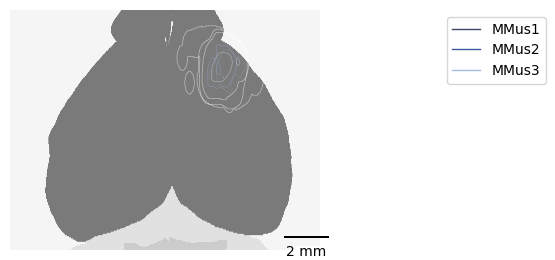

In [75]:

blue1 = create_cmap(39, 50, 86)
blue2 = create_cmap(41, 73, 154)
blue3 = create_cmap(155, 181, 222)
color_list = [blue1, blue2, blue3]

# plot topdown contour of brain
plot_contour(images, mask_dict=masks, roi="inj", masks_to_plot=["grey", "BS", "STR", "CP", "CTX"], 
             view="top", ncontours=1, alpha=0.5, cmaps=color_list, linewidths=0.5,
             ref_fill=True, plot_fill=False)

# set figure size
fig = plt.gcf()
fig.set_size_inches(4,4)

ax = plt.gca()
# ax.invert_xaxis() # need to flip image so injection site on right side as injected
lines = [Line2D([0], [0], color=color_list[i].colors[-1], alpha=0.9, 
                linestyle="-", linewidth=1) for i in range(3)]
labels = ["MMus1", "MMus2", "MMus3"]
plt.legend(lines,labels, bbox_to_anchor=(1.75, 1))

# add scale bar
scalebar = ScaleBar(0.02, "mm", length_fraction=0.25, location="lower right", pad=-0.75)
ax.add_artist(scalebar)



plt.savefig(out_path+"mmus_inj_contour.svg", dpi=300, bbox_inches="tight")
plt.show()

# Visualize in napari

In [9]:
viewer = napari.Viewer()

viewer.add_image(
    masks["OMCi"],
    name="OMCi mask"
)

# add brain images
for i in range(meta_sp_inj.shape[0]):
    viewer.add_image(
        images[i],
        name=meta_sp_inj.loc[i,'brain']
    )

for i in range(len(masks["inj"])):
    viewer.add_image(
        masks["inj"][i],
        name="inj_"+meta_sp_inj.loc[i,'brain']
    )

In [10]:
viewer.close()